<a href="https://colab.research.google.com/github/AbhinandanRoy7/Project/blob/main/Image_Classificaition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test, y_test)=datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
classes=["airplane","automobile","bird","cat","dear","dog","frog","horse","ship","truck"]

In [8]:
def plotSample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

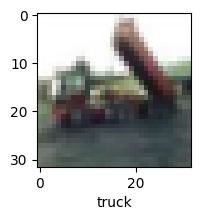

In [9]:
plotSample(X_train,y_train,2)

In [10]:
X_train=X_train/255
X_test=X_test/255
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(3000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3030 - loss: 1.9361
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4166 - loss: 1.6427
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4551 - loss: 1.5447
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4767 - loss: 1.4854
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5007 - loss: 1.4268


In [12]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4530 - loss: 1.5275


[1.5329914093017578, 0.448199987411499]

In [13]:
from sklearn.metrics  import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("Classification Report : \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.59      0.41      0.48      1000
           1       0.66      0.44      0.53      1000
           2       0.48      0.12      0.20      1000
           3       0.31      0.42      0.36      1000
           4       0.45      0.39      0.42      1000
           5       0.37      0.42      0.39      1000
           6       0.42      0.69      0.53      1000
           7       0.67      0.42      0.52      1000
           8       0.37      0.83      0.51      1000
           9       0.65      0.34      0.45      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [14]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),#this layers finds out the features
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
cnn.fit(X_train,y_train,epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3579 - loss: 1.7467
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5649 - loss: 1.2299
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6214 - loss: 1.0836
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6532 - loss: 0.9975
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6728 - loss: 0.9342
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6914 - loss: 0.8882
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7088 - loss: 0.8412
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7177 - loss: 0.8110
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7294 - loss: 0.7753
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7427 - loss: 0.7382
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7493 - loss: 0.7195
Epoch 12/30
1563/1563 ━━━━━

In [17]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6725 - loss: 1.2982


[1.3065208196640015, 0.6726999878883362]

In [25]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

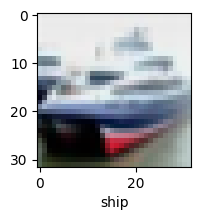

In [40]:
plotSample(X_test,y_test,1)

In [36]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.5663096e-05, 4.0672444e-07, 6.8310542e-06, 9.2893261e-01,
        4.2943553e-05, 6.8691112e-02, 2.2861296e-03, 8.3322112e-07,
        1.0177017e-05, 3.1980039e-06],
       [1.2640338e-04, 5.8337625e-02, 1.2332719e-08, 1.1616462e-10,
        1.4109257e-11, 3.3799864e-13, 6.7740483e-12, 1.5249846e-14,
        9.4153154e-01, 4.5308898e-06],
       [5.9903723e-01, 2.2521393e-01, 7.5124338e-04, 1.1049722e-03,
        4.1539962e-03, 1.3212243e-03, 4.9132004e-04, 7.0805363e-05,
        1.5109136e-02, 1.5274613e-01],
       [6.7246795e-01, 3.3690529e-03, 1.0889439e-01, 3.7964573e-03,
        1.9676275e-04, 2.6426553e-05, 1.7729584e-05, 3.7370050e-05,
        2.1117097e-01, 2.2936720e-05],
       [3.2925485e-11, 1.0962925e-06, 4.7990674e-05, 5.1564439e-03,
        9.0627754e-01, 1.4781469e-07, 8.8516876e-02, 4.3761061e-09,
        2.1046112e-08, 1.2679932e-09]], dtype=float32)

In [37]:
y_classes=[np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [39]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [42]:
print("Classification Report : \n",classification_report(y_test,y_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      1000
           1       0.83      0.77      0.80      1000
           2       0.64      0.48      0.54      1000
           3       0.46      0.51      0.48      1000
           4       0.62      0.65      0.63      1000
           5       0.53      0.62      0.57      1000
           6       0.71      0.79      0.75      1000
           7       0.71      0.76      0.73      1000
           8       0.84      0.71      0.77      1000
           9       0.78      0.73      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

